In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("learning1_data.csv")

In [3]:
data

0         1         2         3         4         5         6  \
0   -0.202268 -0.353959 -0.119095  0.247844  0.120783 -0.263038 -0.537206   
1    0.809660  0.977984 -0.025524 -1.094791 -1.556198 -0.060669  1.057084   
2   -0.283242 -0.188273 -0.175738 -0.118942 -0.096620  0.050365 -0.066805   
3    0.144290  0.030802  0.245908  0.400738  0.250939  0.376150 -0.265817   
4    0.147031  0.113169  0.218939 -0.442279 -0.780985 -0.673755 -0.355651   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.276886 -0.192730  0.108058  0.079642 -0.311127 -0.221611 -0.147273   
476 -0.115004 -0.141876  0.156770  0.342263  0.160012  0.018401 -0.048714   
477 -0.240392  0.229288  0.115306  0.262058  0.342050  0.156611 -0.036038   
478 -0.006846  0.094778  0.120428  0.285535  0.280125  0.027175 -0.165798   
479 -0.436644 -0.516123 -0.508216 -0.288964  0.284258  0.502692 -0.532199   

            7         8         9  ...     25591     25592     25593  \
0   -0.576838 -0.453532 -0.279206  ...  0.071124  0.173103  0.548901   
1    0.878002  0.246451 -0.800890  ... -0.246382  0.358700  0.048618   
2   -0.234286  0.166423  0.164054  ... -0.197872  0.999439  0.847681   
3    0.010329  0.693247 -0.277882  ... -0.855152 -1.051428 -1.167517   
4   -0.073637 -0.030152  0.159664  ... -0.257708 -0.140300  0.295603   
..        ...       ...       ...  ...       ...       ...       ...   
475 -0.174633 -0.365725 -0.381783  ... -0.094367 -0.133169  0.044955   
476 -0.215187 -0.239910  0.001983  ...  0.398198  0.442239  0.557199   
477 -0.343879 -0.400363 -0.409394  ...  0.057502  0.128183  0.287794   
478 -0.301975 -0.359229 -0.233261  ... -0.683152 -0.270689  0.155243   
479 -0.307684  0.426273  0.429954  ...  0.168603  0.092843  0.004254   

        25594     25595     25596     25597     25598     25599  fault_type  
0    0.481414  0.422957  0.223891  0.001842 -0.218857  0.000951           1  
1   -0.172239  0.098558  1.466061  1.252963  0.190932 -0.384616           1  
2    0.051769  0.890592  1.043328  0.884492  0.792582  0.220288           1  
3   -1.048143  0.088135 -0.213551 -0.387816 -0.188670  0.041774           1  
4   -0.060675 -0.335117 -0.440216 -0.322704  0.446788  0.769093           1  
..        ...       ...       ...       ...       ...       ...         ...  
475  0.302521  0.241121  0.043294  0.003460 -0.033871 -0.104319           0  
476  0.383141  0.367553  0.106910 -0.074565  0.101684 -0.073845           0  
477  0.170361  0.267327  0.142104 -0.110235 -0.285532 -0.255486           0  
478  0.085986  0.005096 -0.103922 -0.115395  0.294986  0.056098           0  
479  0.145126  0.395023  0.279874  0.054254  0.158223  0.446397           0  

[480 rows x 25601 columns]

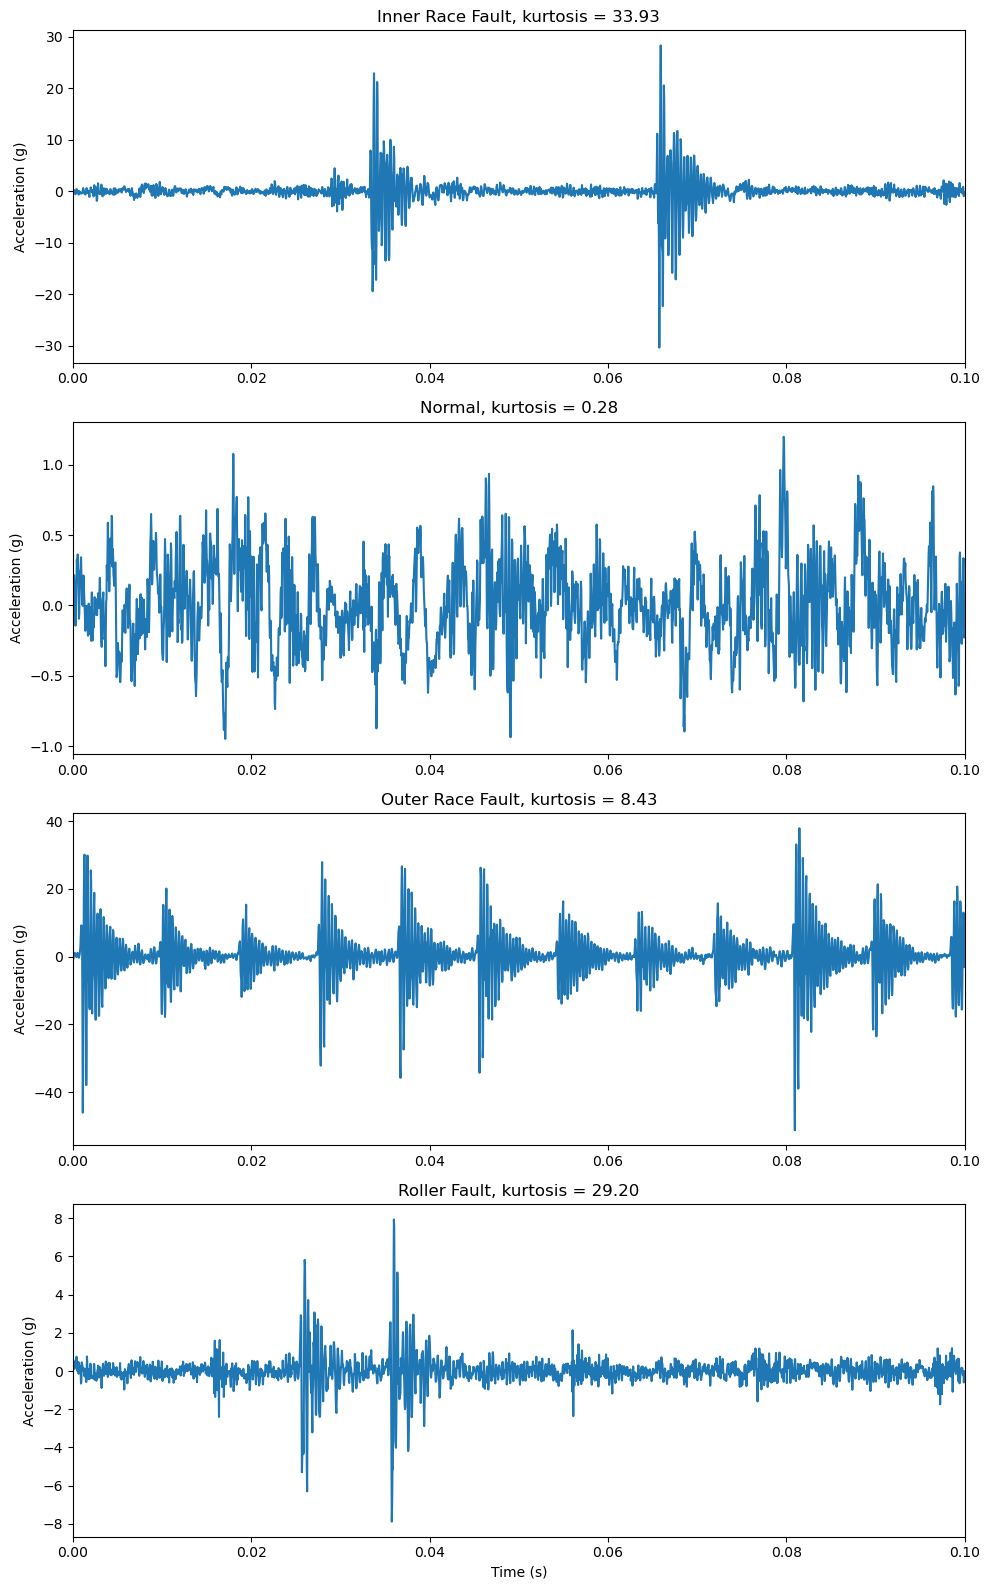

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# fault_type에 따른 데이터 필터링
inner_fault = data[data['fault_type'] == 1].iloc[:, :-1].values.flatten()
roller_fault = data[data['fault_type'] == 2].iloc[:, :-1].values.flatten()
outer_fault = data[data['fault_type'] == 3].iloc[:, :-1].values.flatten()
normal = data[data['fault_type'] == 0].iloc[:, :-1].values.flatten()

# 시간 축 설정 (샘플링 속도 25600 Hz 기준)
time = np.linspace(0, 0.1, 2560)  # 0.1초까지의 데이터만 시각화

# 첨도 계산 및 시각화
plt.figure(figsize=(10, 16))

# Inner Race Fault
kurt_inner = kurtosis(inner_fault[:2560])  # 0.1초 기준으로 2560 샘플 사용
plt.subplot(4, 1, 1)
plt.plot(time, inner_fault[:2560])
plt.ylabel('Acceleration (g)')
plt.title(f'Inner Race Fault, kurtosis = {kurt_inner:.2f}')
plt.xlim([0, 0.1])

# Normal
kurt_normal = kurtosis(normal[:2560])
plt.subplot(4, 1, 2)
plt.plot(time, normal[:2560])
plt.ylabel('Acceleration (g)')
plt.title(f'Normal, kurtosis = {kurt_normal:.2f}')
plt.xlim([0, 0.1])

# Outer Race Fault
kurt_outer = kurtosis(outer_fault[:2560])
plt.subplot(4, 1, 3)
plt.plot(time, outer_fault[:2560])
plt.ylabel('Acceleration (g)')
plt.title(f'Outer Race Fault, kurtosis = {kurt_outer:.2f}')
plt.xlim([0, 0.1])

# Roller Fault
kurt_roller = kurtosis(roller_fault[:2560])
plt.subplot(4, 1, 4)
plt.plot(time, roller_fault[:2560])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title(f'Roller Fault, kurtosis = {kurt_roller:.2f}')
plt.xlim([0, 0.1])

plt.tight_layout()
plt.show()


## 내륜

In [4]:
row_10 = data.iloc[9, :-1].values

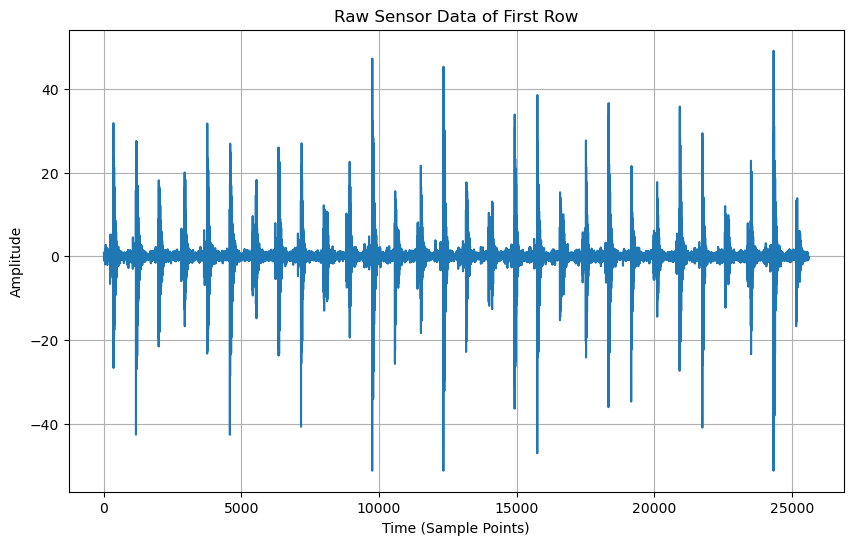

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(row_10)
plt.title('Raw Sensor Data of First Row')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

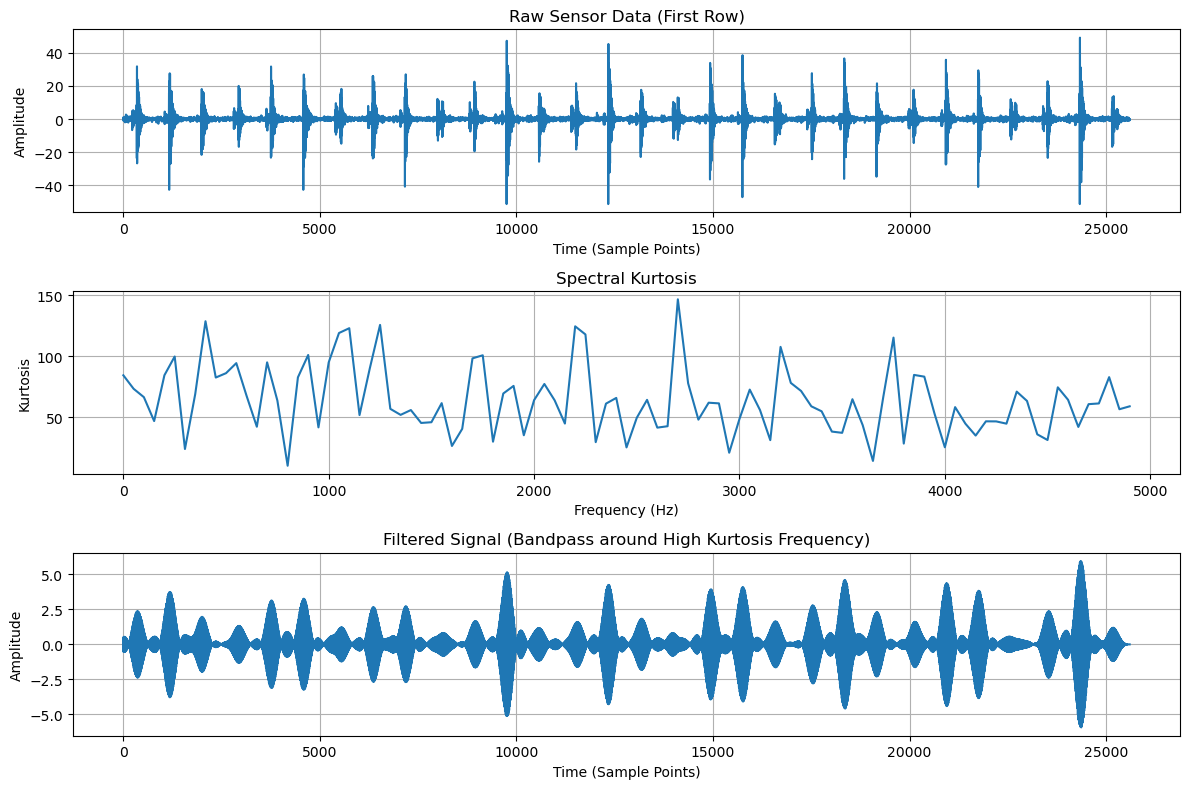

In [12]:
import numpy as np
from scipy.signal import butter, filtfilt, spectrogram
import matplotlib.pyplot as plt

# 데이터 정보 설정
fs = 25600  # 샘플링 주파수 25,600 Hz
rotation_speed = 1800 / 60  # 회전 속도 (단위: Hz)
signal = row_10  # 첫 행의 센서 데이터 (사용자 데이터 입력 필요)

# 스펙트럼 첨도 분석 함수
def spectral_kurtosis(signal, fs, nperseg=512, noverlap=256):
    f, t, Sxx = spectrogram(signal, fs, nperseg=nperseg, noverlap=noverlap)
    kurtosis_values = np.mean(((Sxx - np.mean(Sxx, axis=0)) ** 4), axis=0) / (np.mean((Sxx - np.mean(Sxx, axis=0)) ** 2, axis=0) ** 2)
    # kurtosis_values의 길이에 맞게 f를 조정합니다.
    max_kurtosis_freq = f[:len(kurtosis_values)][np.argmax(kurtosis_values)]
    return f[:len(kurtosis_values)], t, Sxx, kurtosis_values, max_kurtosis_freq

# 대역 통과 필터 함수
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# 스펙트럼 첨도 분석 수행
f, t, Sxx, kurtosis_values, max_kurtosis_freq = spectral_kurtosis(signal, fs)

# 높은 첨도를 갖는 주파수 대역 찾기
bandwidth = 100  # 필터링 대역폭 (필요시 조정)
lowcut = max(0, max_kurtosis_freq - bandwidth / 2)
highcut = max_kurtosis_freq + bandwidth / 2

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# 원본 및 필터링 신호 시각화
plt.figure(figsize=(12, 8))

# 원본 신호
plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title('Raw Sensor Data (First Row)')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)

# 스펙트럼 첨도
plt.subplot(3, 1, 2)
plt.plot(f, kurtosis_values)
plt.title('Spectral Kurtosis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Kurtosis')
plt.grid(True)

# 필터링 신호
plt.subplot(3, 1, 3)
plt.plot(filtered_signal)
plt.title('Filtered Signal (Bandpass around High Kurtosis Frequency)')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


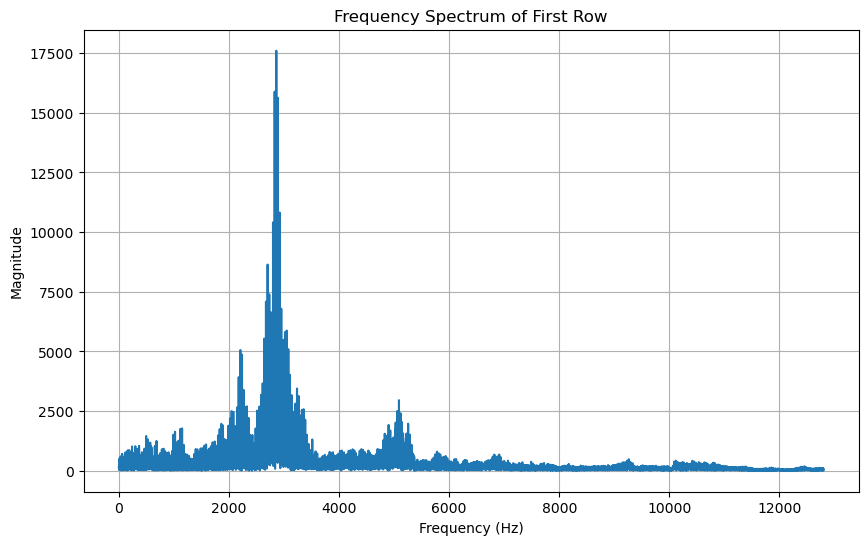

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 적용
fft_values = np.fft.fft(row_10)
fft_magnitude = np.abs(fft_values)  # FFT 결과의 절댓값을 사용하여 크기 계산
n = len(row_10)
sampling_rate = 25600  # 샘플링 주파수, 필요시 변경
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # 주파수 축 생성

# 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], fft_magnitude[:n // 2])  # 양의 주파수 성분만 시각화
plt.title('Frequency Spectrum of First Row')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


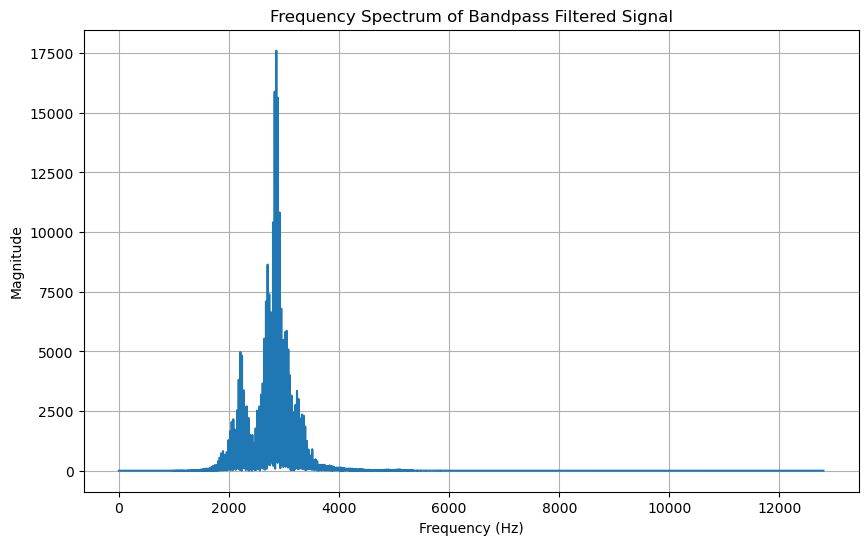

In [7]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def bandpass_filter(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate  # 나이퀴스트 주파수
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # 대역 통과 필터 생성
    y = lfilter(b, a, data)
    return y

# 샘플링 주파수 및 필터 경계 설정
sampling_rate = 25600  # Hz, 필요시 조정
lowcut = 2000  # 저주파 경계 (Hz)
highcut = 3500  # 고주파 경계 (Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 필터링된 신호의 주파수 스펙트럼 계산 (FFT)
fft_filtered = np.fft.fft(filtered_signal)
fft_filtered_magnitude = np.abs(fft_filtered)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sampling_rate)

# 필터링된 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(filtered_signal) // 2], fft_filtered_magnitude[:len(filtered_signal) // 2])
plt.title('Frequency Spectrum of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


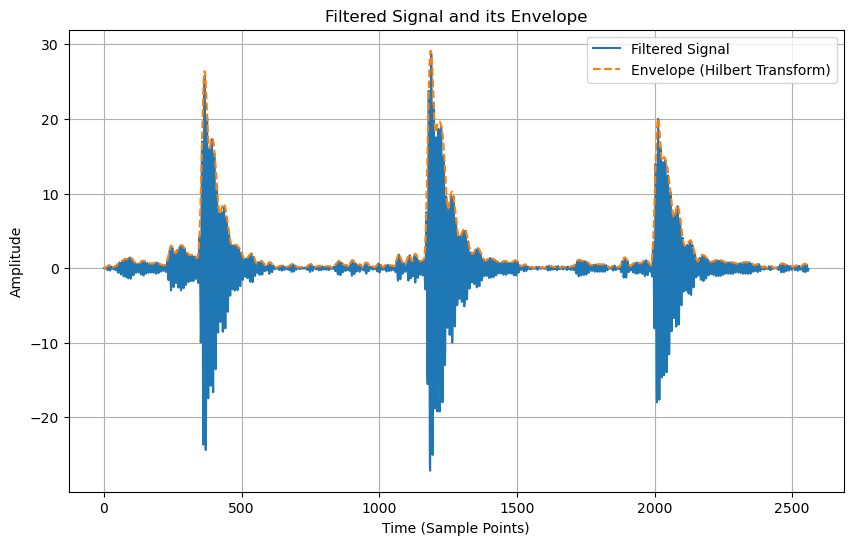

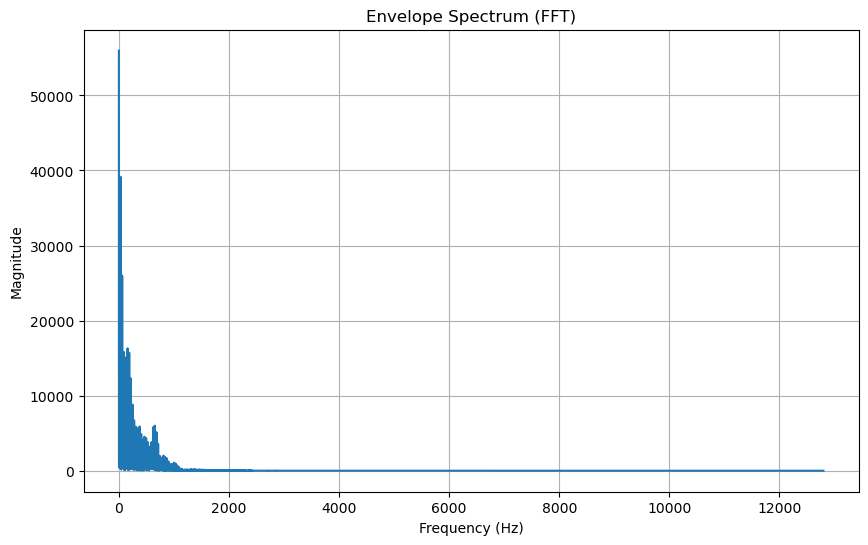

In [8]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


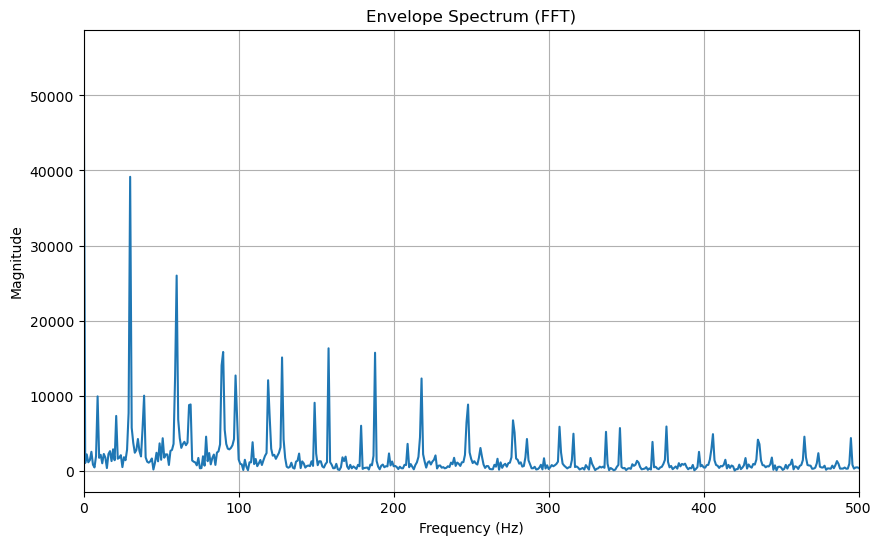

In [10]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~4000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 500)  # x축 범위 설정
plt.show()


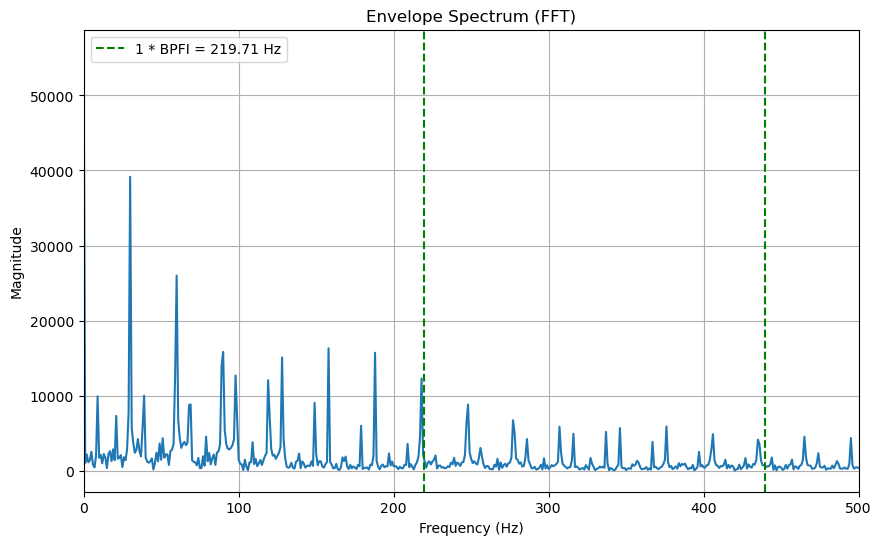

In [12]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~1000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 500)  # x축 범위 설정

# BPFO와 그 배수에 수직선 그리기
BPFI = 219.71  # BPFO 값
harmonics = 20  # 그릴 배수의 개수 (예: 1x, 2x, ..., 5x)

for i in range(1, harmonics + 1):
    plt.axvline(x=BPFI * i, color='g', linestyle='--', label=f'{i} * BPFI = {BPFI * i:.2f} Hz' if i == 1 else "")

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()



## 롤러

In [28]:
row_130 = data.iloc[129, :-1].values

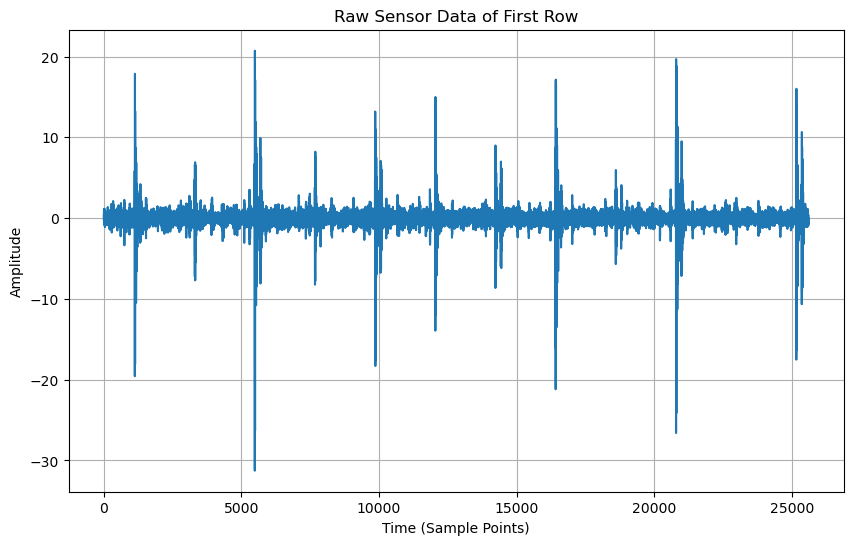

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(row_130)
plt.title('Raw Sensor Data of First Row')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

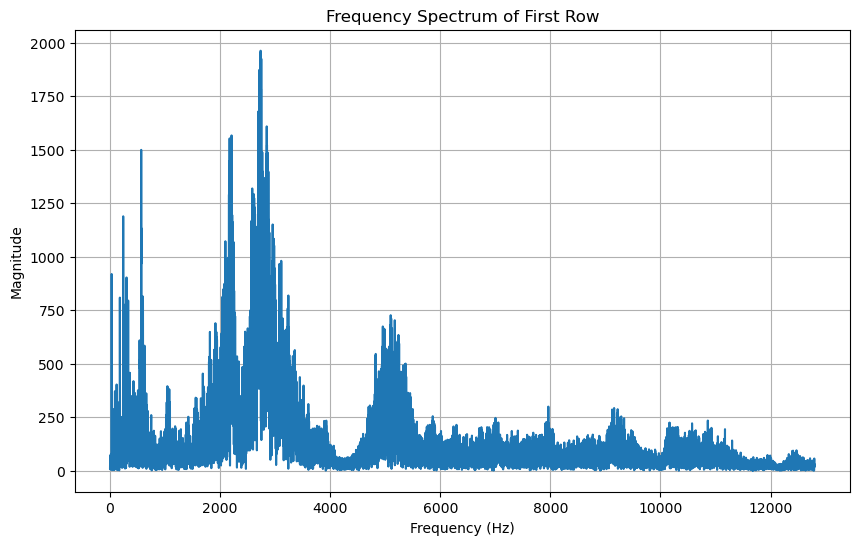

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 적용
fft_values = np.fft.fft(row_130)
fft_magnitude = np.abs(fft_values)  # FFT 결과의 절댓값을 사용하여 크기 계산
n = len(row_130)
sampling_rate = 25600  # 샘플링 주파수, 필요시 변경
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # 주파수 축 생성

# 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], fft_magnitude[:n // 2])  # 양의 주파수 성분만 시각화
plt.title('Frequency Spectrum of First Row')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


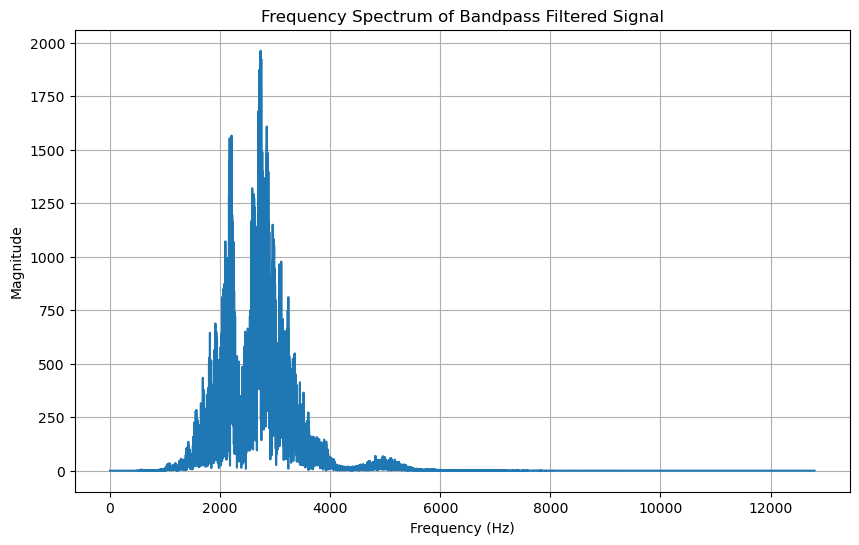

In [34]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def bandpass_filter(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate  # 나이퀴스트 주파수
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # 대역 통과 필터 생성
    y = lfilter(b, a, data)
    return y

# 샘플링 주파수 및 필터 경계 설정
sampling_rate = 25600  # Hz, 필요시 조정
lowcut = 1500  # 저주파 경계 (Hz)
highcut = 3800  # 고주파 경계 (Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(row_130, lowcut, highcut, sampling_rate)

# 필터링된 신호의 주파수 스펙트럼 계산 (FFT)
fft_filtered = np.fft.fft(filtered_signal)
fft_filtered_magnitude = np.abs(fft_filtered)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sampling_rate)

# 필터링된 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(filtered_signal) // 2], fft_filtered_magnitude[:len(filtered_signal) // 2])
plt.title('Frequency Spectrum of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


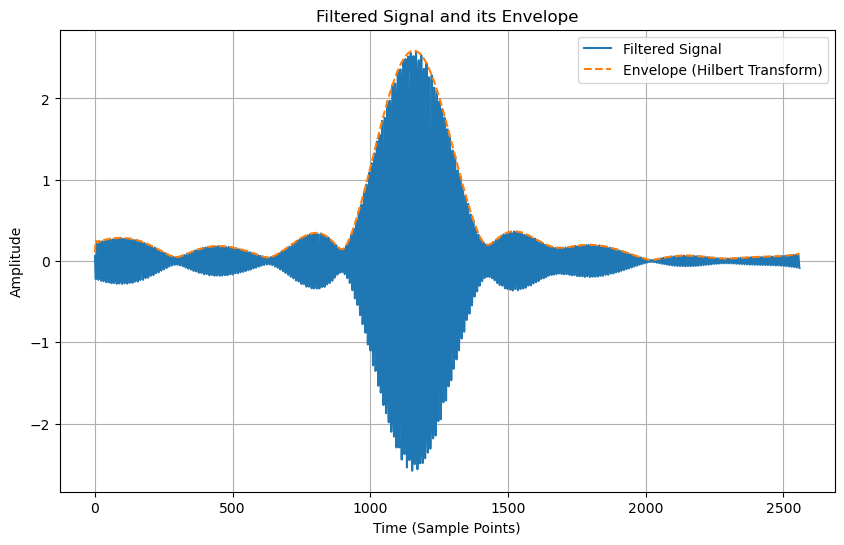

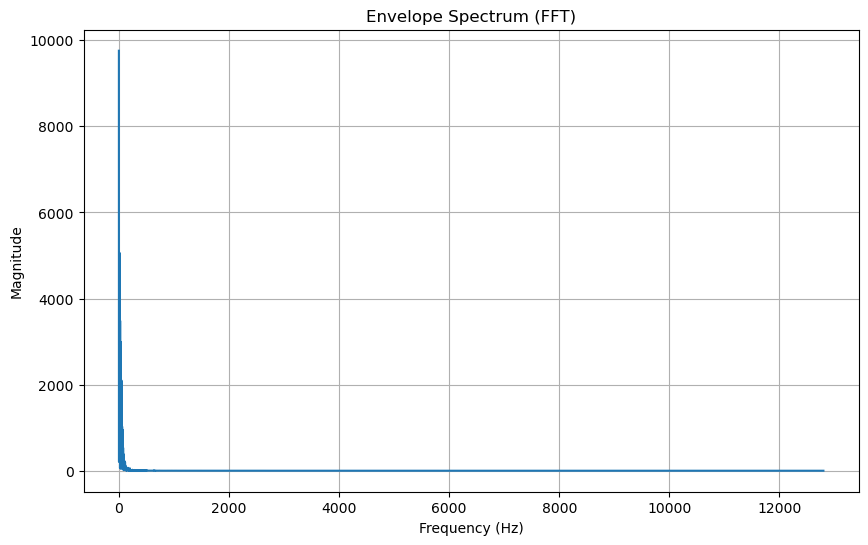

In [67]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_130, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


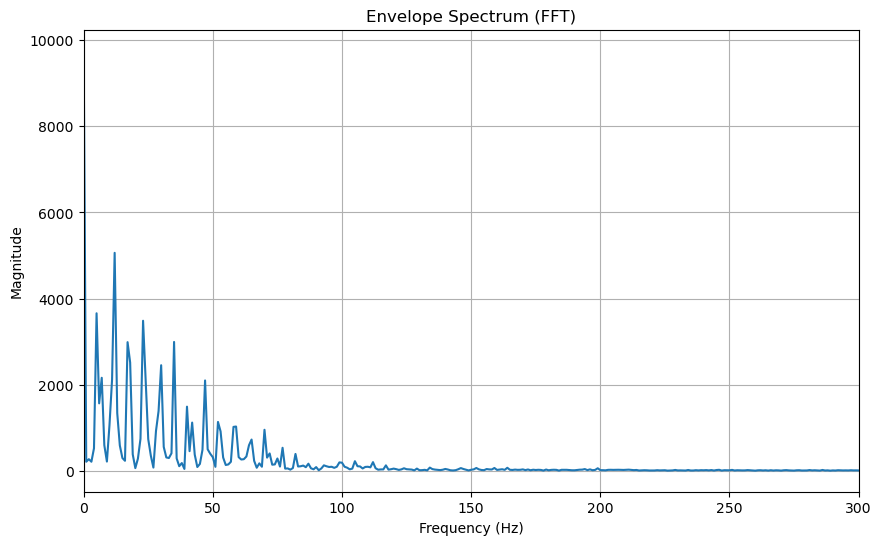

In [68]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_130, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~4000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 300)  # x축 범위 설정
plt.show()


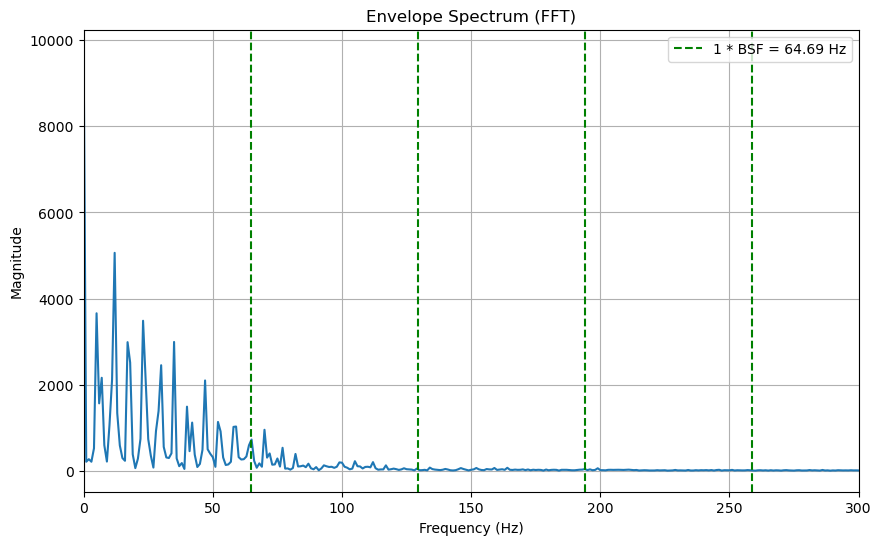

In [69]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_130, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~1000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 300)  # x축 범위 설정

# BSF와 그 배수에 수직선 그리기
BSF = 64.69  # BPFO 값
harmonics = 7  # 그릴 배수의 개수 (예: 1x, 2x, ..., 5x)

for i in range(1, harmonics + 1):
    plt.axvline(x=BSF * i, color='g', linestyle='--', label=f'{i} * BSF = {BSF * i:.2f} Hz' if i == 1 else "")

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()



## 다른 방식

In [22]:
row_130 = data.iloc[129, :-1].values

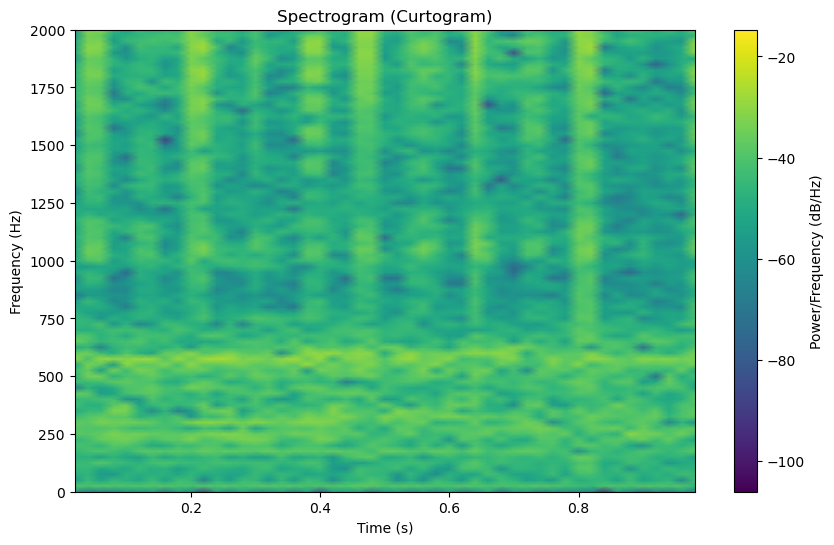

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# 새로운 샘플링 주파수와 데이터 길이 적용
sampling_rate = 25600  # 샘플링 주파수 (25,600 Hz)
signal_duration = 1  # 신호 길이 (1초)
num_samples = sampling_rate * signal_duration  # 데이터 포인트 수

# 예시 신호 (row_130) - 실제 데이터로 대체 필요
# 예를 들어, row_130 = np.random.randn(num_samples)로 테스트할 수 있습니다.
# 실제 데이터가 없으므로 이 예제에서는 랜덤 신호로 대체
row_130 = data.iloc[129, :-1].values 

# 커토그램 생성 (nperseg과 noverlap은 신호의 길이에 맞게 조정)
nperseg = 1024  # 주파수 해상도 (필요에 따라 조정 가능)
noverlap = nperseg // 2  # 겹치는 샘플 수 (일반적으로 절반 사용)

# 스펙트로그램 계산
frequencies, times, Sxx = spectrogram(row_130, fs=sampling_rate, nperseg=nperseg, noverlap=noverlap)

# 커토그램 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram (Curtogram)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylim(0, 2000)  # 주파수 축 제한 (0-2000 Hz)
plt.show()


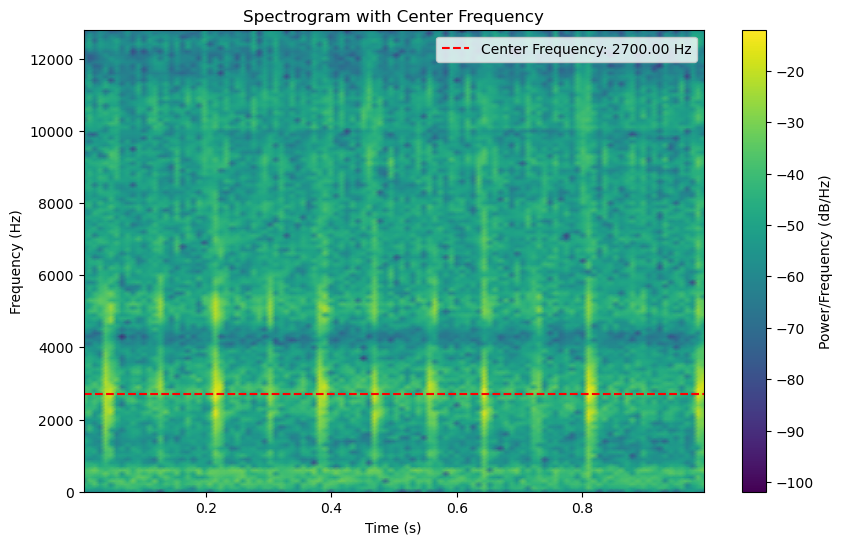

중심 주파수는 2700.00 Hz입니다.


In [52]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# 예제 신호 및 샘플링 주파수 설정
fs = 25600  # 샘플링 주파수 (사용자의 샘플링 주파수로 설정 필요)
signal = row_130  # 사용자의 신호 데이터

# 스펙트로그램 계산
frequencies, times, Sxx = spectrogram(signal, fs)

# 주파수별 평균 파워 계산
mean_power_per_freq = Sxx.mean(axis=1)
center_frequency = frequencies[np.argmax(mean_power_per_freq)]

# 스펙트로그램 시각화 및 중심 주파수 표시
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram with Center Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.axhline(center_frequency, color='r', linestyle='--', label=f'Center Frequency: {center_frequency:.2f} Hz')
plt.legend()
plt.show()

print(f"중심 주파수는 {center_frequency:.2f} Hz입니다.")


In [53]:
import numpy as np
from scipy.signal import spectrogram

# 신호와 샘플링 주파수 설정
fs = 25600  # 샘플링 주파수
signal = row_130  # 원본 신호

# 커토그램 분석 함수
def calculate_kurtosis_per_band(signal, fs, nperseg=512, noverlap=256):
    # 스펙트로그램 계산
    f, t, Sxx = spectrogram(signal, fs, nperseg=nperseg, noverlap=noverlap)
    
    # 각 주파수 대역의 첨도 계산
    kurtosis_values = np.mean(((Sxx - np.mean(Sxx, axis=0)) ** 4), axis=0) / (np.mean((Sxx - np.mean(Sxx, axis=0)) ** 2, axis=0) ** 2)
    
    # 가장 높은 첨도 값을 가지는 주파수 대역 찾기
    max_kurtosis_idx = np.argmax(kurtosis_values)
    max_kurtosis_freq = f[max_kurtosis_idx]
    max_kurtosis_value = kurtosis_values[max_kurtosis_idx]
    
    return max_kurtosis_freq, max_kurtosis_value

# 가장 높은 첨도를 가지는 주파수 대역과 대역폭
max_kurtosis_freq, max_kurtosis_value = calculate_kurtosis_per_band(signal, fs)

print(f"가장 높은 첨도를 가지는 주파수 대역 중심 주파수: {max_kurtosis_freq:.2f} Hz")
print(f"가장 높은 첨도 값: {max_kurtosis_value:.2f}")


가장 높은 첨도를 가지는 주파수 대역 중심 주파수: 2600.00 Hz
가장 높은 첨도 값: 159.14


## 커토그램(내륜)

In [55]:
row_10 = data.iloc[9, :-1].values

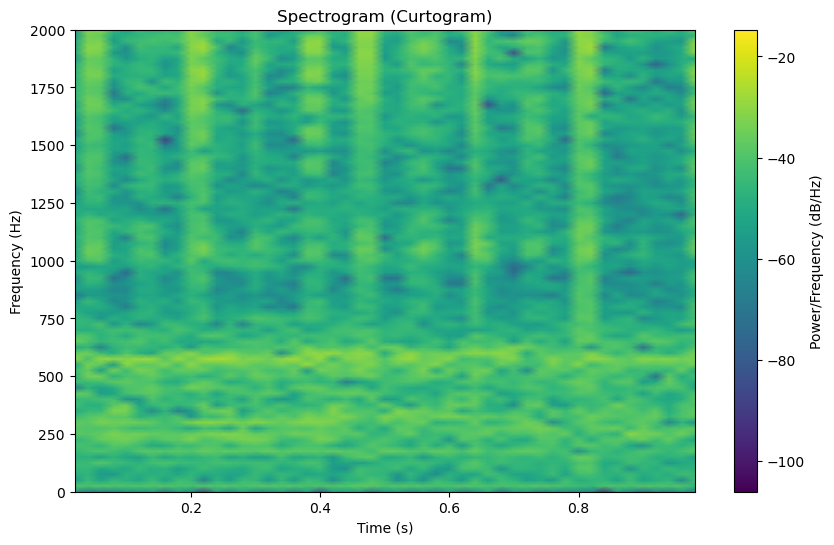

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# 새로운 샘플링 주파수와 데이터 길이 적용
sampling_rate = 25600  # 샘플링 주파수 (25,600 Hz)
signal_duration = 1  # 신호 길이 (1초)
num_samples = sampling_rate * signal_duration  # 데이터 포인트 수

row_10 = data.iloc[9, :-1].values

# 커토그램 생성 (nperseg과 noverlap은 신호의 길이에 맞게 조정)
nperseg = 1024  # 주파수 해상도 (필요에 따라 조정 가능)
noverlap = nperseg // 2  # 겹치는 샘플 수 (일반적으로 절반 사용)

# 스펙트로그램 계산
frequencies, times, Sxx = spectrogram(row_130, fs=sampling_rate, nperseg=nperseg, noverlap=noverlap)

# 커토그램 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram (Curtogram)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylim(0, 2000)  # 주파수 축 제한 (0-2000 Hz)
plt.show()


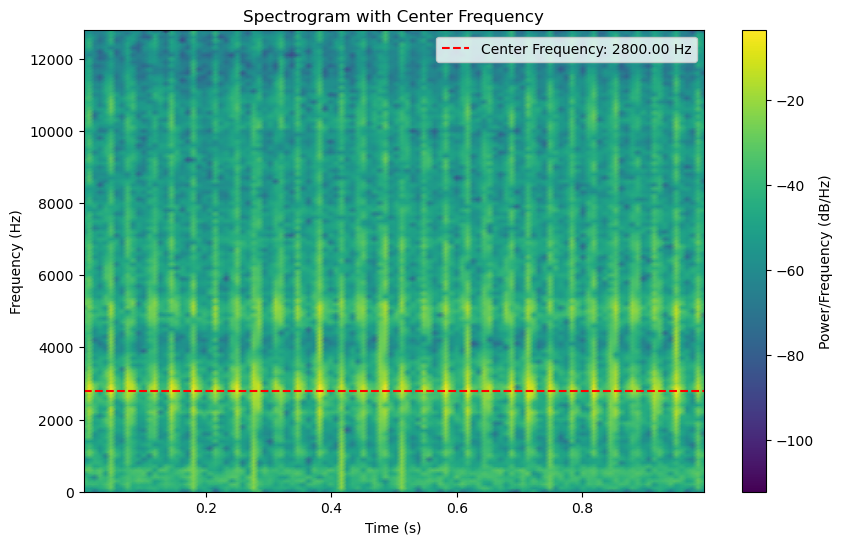

중심 주파수는 2800.00 Hz입니다.


In [57]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# 예제 신호 및 샘플링 주파수 설정
fs = 25600  # 샘플링 주파수 (사용자의 샘플링 주파수로 설정 필요)
signal = row_10  # 사용자의 신호 데이터

# 스펙트로그램 계산
frequencies, times, Sxx = spectrogram(signal, fs)

# 주파수별 평균 파워 계산
mean_power_per_freq = Sxx.mean(axis=1)
center_frequency = frequencies[np.argmax(mean_power_per_freq)]

# 스펙트로그램 시각화 및 중심 주파수 표시
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram with Center Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.axhline(center_frequency, color='r', linestyle='--', label=f'Center Frequency: {center_frequency:.2f} Hz')
plt.legend()
plt.show()

print(f"중심 주파수는 {center_frequency:.2f} Hz입니다.")


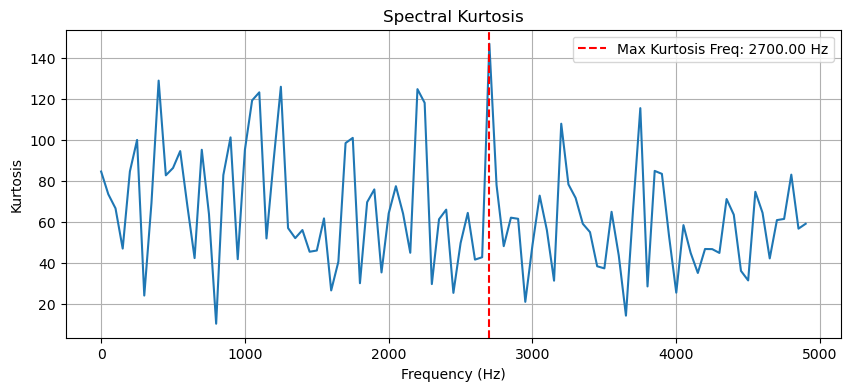

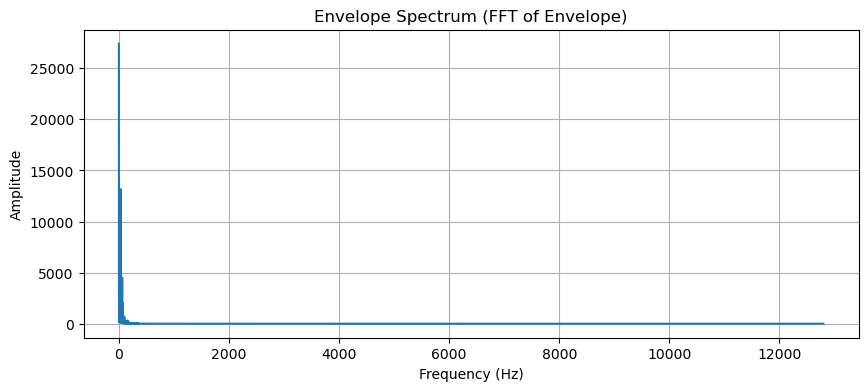

In [38]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert, spectrogram
import matplotlib.pyplot as plt

# 대역통과 필터 함수 정의
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# 스펙트럼 첨도 계산 및 커토그램 생성
def spectral_kurtosis(signal, fs, nperseg=512, noverlap=256):
    f, t, Sxx = spectrogram(signal, fs, nperseg=nperseg, noverlap=noverlap)
    kurtosis_values = np.mean(((Sxx - np.mean(Sxx, axis=0)) ** 4), axis=0) / (np.mean((Sxx - np.mean(Sxx, axis=0)) ** 2, axis=0) ** 2)
    max_kurtosis_freq = f[:len(kurtosis_values)][np.argmax(kurtosis_values)]
    return f[:len(kurtosis_values)], kurtosis_values, max_kurtosis_freq

# 샘플링 주파수와 신호 정의 (사용자 데이터로 교체 필요)
fs = 25600  # 예: 샘플링 주파수
signal = row_10  # 사용자 신호 데이터

# 커토그램 및 스펙트럼 첨도 계산
f, kurtosis_values, max_kurtosis_freq = spectral_kurtosis(signal, fs)

# 가장 높은 첨도를 갖는 주파수 대역으로 대역통과 필터 적용
bandwidth = 100  # 대역폭 설정 (필요시 조정)
lowcut = max(0, max_kurtosis_freq - bandwidth / 2)
highcut = max_kurtosis_freq + bandwidth / 2
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# 힐베르트 변환으로 포락선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

# 포락선 스펙트럼(FFT) 분석
fft_envelope = np.fft.fft(envelope)
freqs = np.fft.fftfreq(len(envelope), 1/fs)

# 커토그램 시각화
plt.figure(figsize=(10, 4))
plt.plot(f, kurtosis_values)
plt.title('Spectral Kurtosis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Kurtosis')
plt.axvline(x=max_kurtosis_freq, color='r', linestyle='--', label=f'Max Kurtosis Freq: {max_kurtosis_freq:.2f} Hz')
plt.legend()
plt.grid(True)
plt.show()

# 포락선 스펙트럼(FFT) 시각화
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_envelope)[:len(freqs)//2])
plt.title('Envelope Spectrum (FFT of Envelope)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


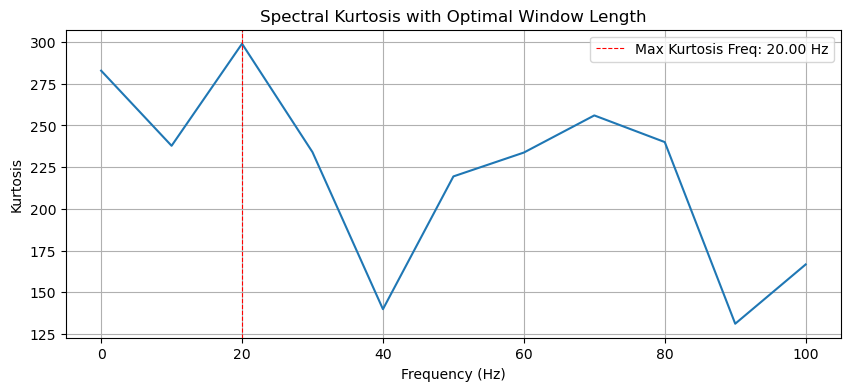

In [27]:
import numpy as np
from scipy.signal import spectrogram

# 신호 및 샘플링 주파수 설정
fs = 25600  # 샘플링 주파수 (단위: Hz)
signal = row_10  # 사용자 신호 데이터

# 최적 윈도우 길이 (예: 0.1초 ~ 0.2초)
optimal_window_length = int(fs * 0.1)  # 0.1초 = 약 2560 샘플
nperseg = optimal_window_length

# 스펙트럼 첨도 계산 함수
def spectral_kurtosis(signal, fs, nperseg, noverlap=None):
    f, t, Sxx = spectrogram(signal, fs, nperseg=nperseg, noverlap=noverlap)
    kurtosis_values = np.mean(((Sxx - np.mean(Sxx, axis=0)) ** 4), axis=0) / (np.mean((Sxx - np.mean(Sxx, axis=0)) ** 2, axis=0) ** 2)
    max_kurtosis_freq = f[:len(kurtosis_values)][np.argmax(kurtosis_values)]
    return f[:len(kurtosis_values)], kurtosis_values, max_kurtosis_freq

# 스펙트럼 첨도 계산
f, kurtosis_values, max_kurtosis_freq = spectral_kurtosis(signal, fs, nperseg)

# 스펙트럼 첨도 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(f, kurtosis_values)
plt.title('Spectral Kurtosis with Optimal Window Length')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Kurtosis')
plt.grid(True)
plt.axvline(x=max_kurtosis_freq, color='r', linestyle='--', linewidth=0.8, label=f'Max Kurtosis Freq: {max_kurtosis_freq:.2f} Hz')
plt.legend()
plt.show()


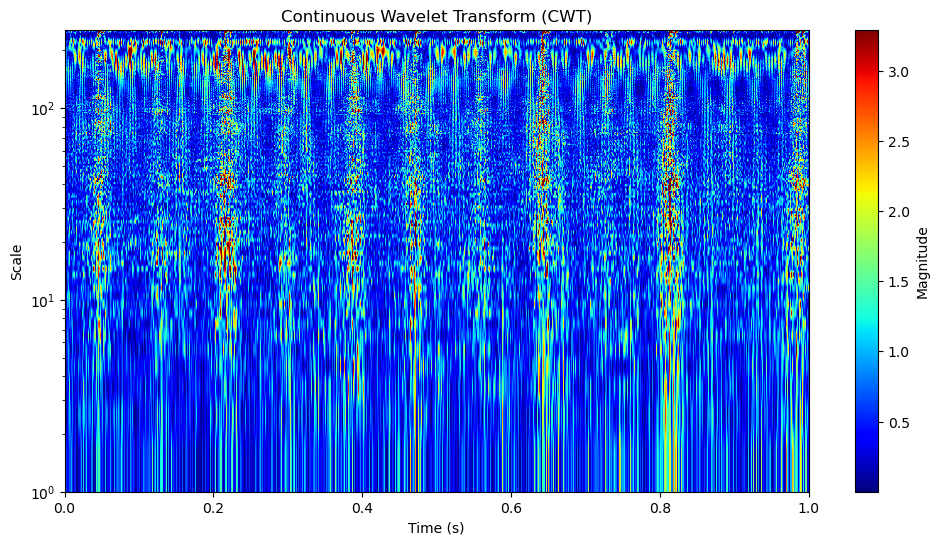

In [16]:
#웨이블릿 변환
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 샘플 데이터 (row_130) - 실제 데이터로 대체 필요
# row_130은 실제 신호 데이터 배열로 변경해야 합니다.

# 웨이블릿 변환을 위한 스케일 설정
scales = np.arange(1, 256)  # 스케일 범위 설정 (필요에 따라 조정)

# 웨이블릿 변환 (CWT) 수행
coefficients, frequencies = pywt.cwt(row_130, scales, 'morl', sampling_period=1/25600)

# CWT 결과 시각화
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), extent=[0, len(row_130) / 25600, 1, 256], cmap='jet', aspect='auto',
           vmax=np.percentile(np.abs(coefficients), 99))  # 상위 1% 기준으로 색상 조정
plt.colorbar(label='Magnitude')
plt.yscale('log')
plt.title('Continuous Wavelet Transform (CWT)')
plt.ylabel('Scale')
plt.xlabel('Time (s)')
plt.show()


## 다다시

In [82]:
row_10 = data.iloc[9, :-1].values

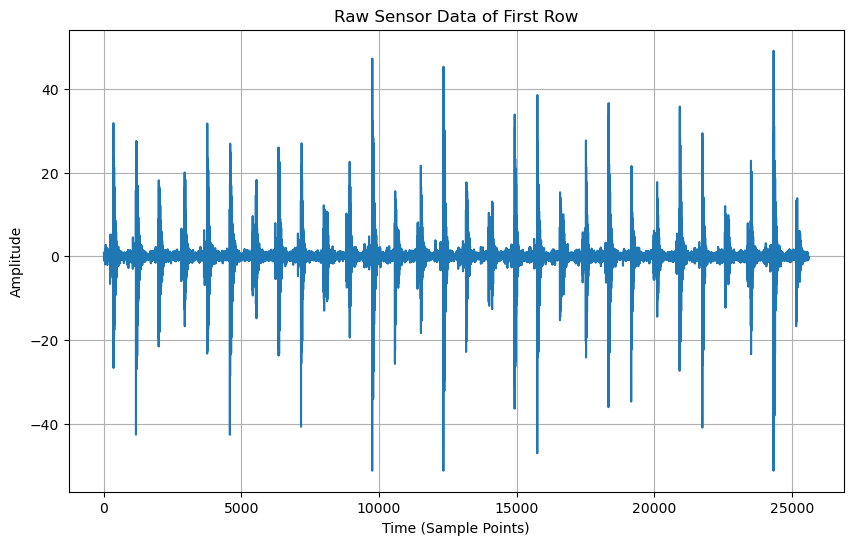

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(row_10)
plt.title('Raw Sensor Data of First Row')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

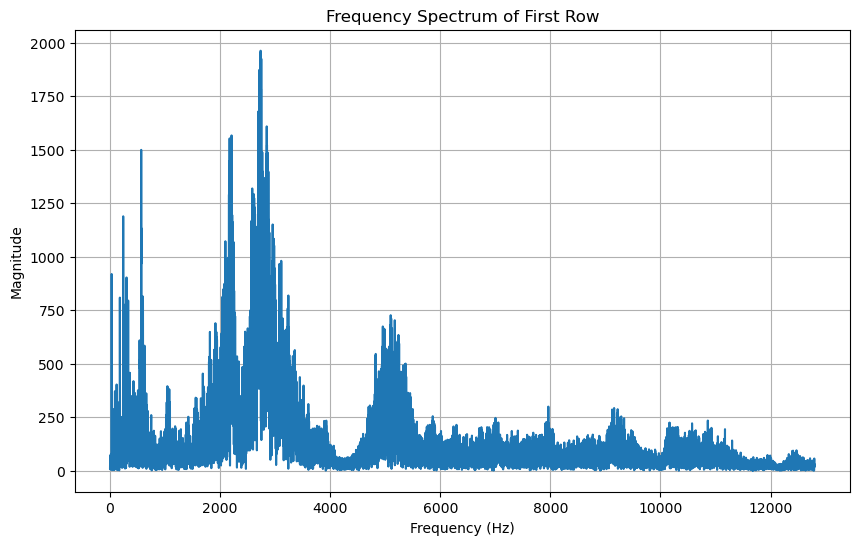

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 적용
fft_values = np.fft.fft(row_130)
fft_magnitude = np.abs(fft_values)  # FFT 결과의 절댓값을 사용하여 크기 계산
n = len(row_130)
sampling_rate = 25600  # 샘플링 주파수, 필요시 변경
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # 주파수 축 생성

# 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], fft_magnitude[:n // 2])  # 양의 주파수 성분만 시각화
plt.title('Frequency Spectrum of First Row')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

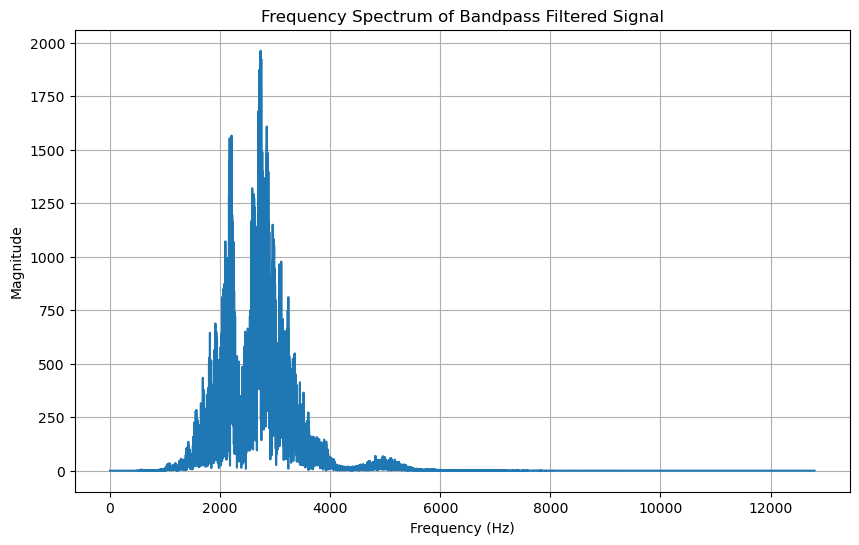

In [87]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def bandpass_filter(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate  # 나이퀴스트 주파수
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # 대역 통과 필터 생성
    y = lfilter(b, a, data)
    return y

# 샘플링 주파수 및 필터 경계 설정
sampling_rate = 25600  # Hz, 필요시 조정
lowcut = 1500  # 저주파 경계 (Hz)
highcut = 3800  # 고주파 경계 (Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(row_130, lowcut, highcut, sampling_rate)

# 필터링된 신호의 주파수 스펙트럼 계산 (FFT)
fft_filtered = np.fft.fft(filtered_signal)
fft_filtered_magnitude = np.abs(fft_filtered)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sampling_rate)

# 필터링된 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(filtered_signal) // 2], fft_filtered_magnitude[:len(filtered_signal) // 2])
plt.title('Frequency Spectrum of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

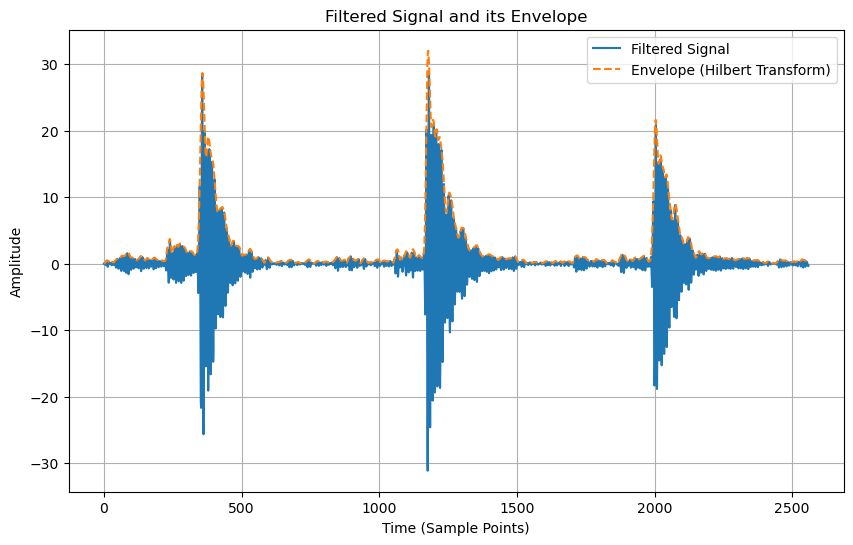

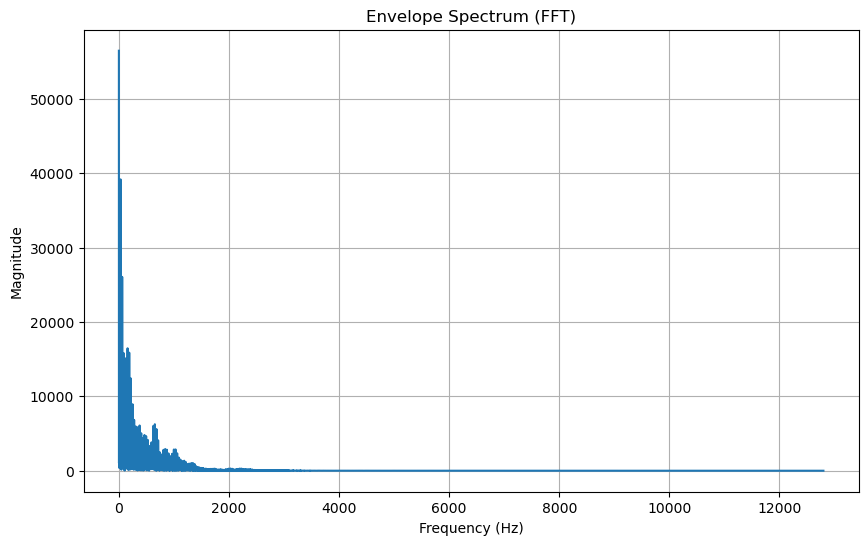

In [88]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


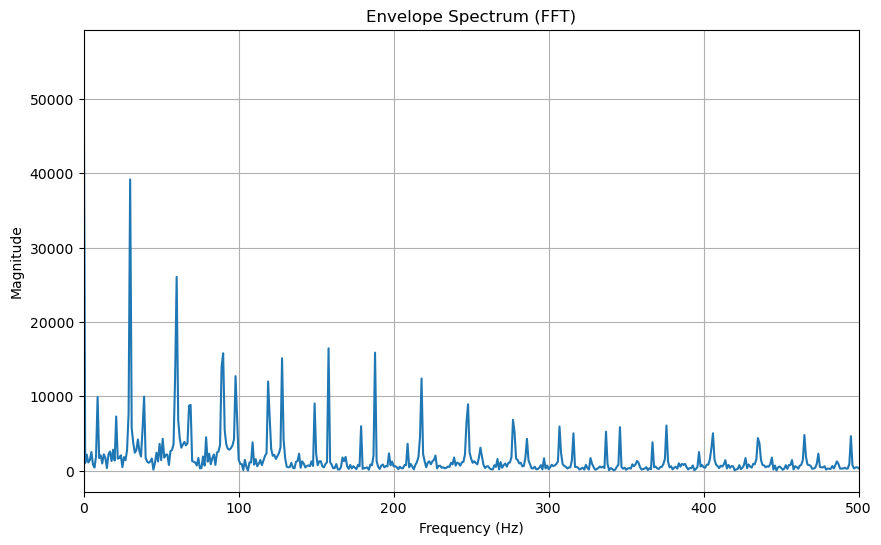

In [91]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~4000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 500)  # x축 범위 설정
plt.show()

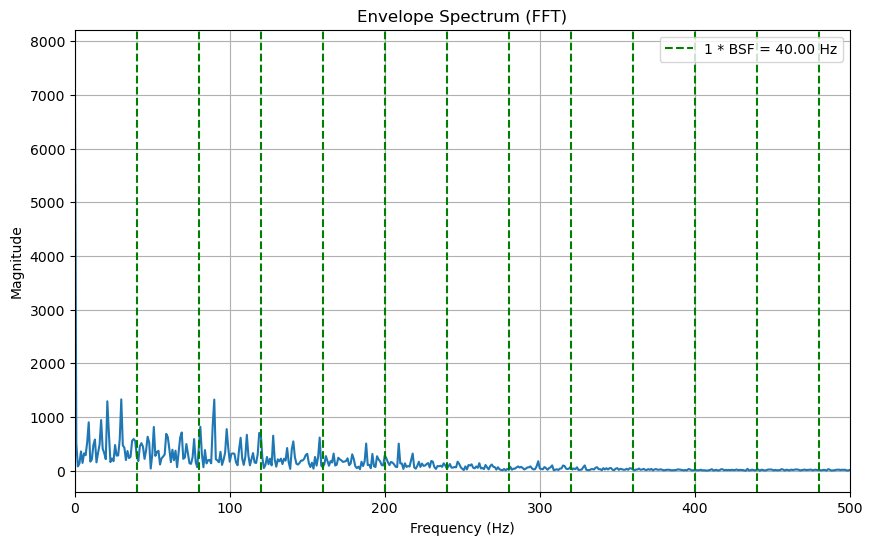

In [104]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~1000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 500)  # x축 범위 설정

# BPFO와 그 배수에 수직선 그리기
BPFO = 40# BPFO 값
harmonics = 20  # 그릴 배수의 개수 (예: 1x, 2x, ..., 5x)

for i in range(1, harmonics + 1):
    plt.axvline(x=BPFO * i, color='g', linestyle='--', label=f'{i} * BSF = {BPFO * i:.2f} Hz' if i == 1 else "")

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()
